# Captsone Project - 7Park 
#### The goal of the project is to predict Zillow Home/Rent values using data models.
##### Dependent Variable: ZIRI 
##### Predictors: Recommended Census (ACS) Data & Other Gov't Data Sources

In [24]:
!pip install google-cloud-bigquery-storage
!pip install --upgrade "google-cloud-bigquery[pandas]"
!pip install pyarrow

In [26]:
import pandas as pd
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="optical-hexagon-308004-a6230a51110a.json"
client = bigquery.Client()


In [3]:
%load_ext google.cloud.bigquery

In [14]:
%%bigquery zip_codes_2015
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`

Downloading: 100%|███████████████████████████████████████████████████████████| 33120/33120 [00:08<00:00, 3730.49rows/s]


In [9]:
zip_codes_2015.shape

(33120, 247)

In [11]:
zip_codes_2015.head()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,pop_5_years_over,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,do_date
0,98304,222.000000000,112.000000000,1974.000000000,18.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,...,21.000000000,90.000000000,42.000000000,347.000000000,0E-9,636.000000000,611.000000000,0E-9,0E-9,20112015
1,22714,74.000000000,304.000000000,1978.000000000,6.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,...,0E-9,86.000000000,77.000000000,562.000000000,29.000000000,1058.000000000,1046.000000000,12.000000000,0E-9,20112015
2,69128,24.000000000,74.000000000,1955.000000000,0E-9,0E-9,0E-9,0E-9,3.000000000,0E-9,...,3.000000000,2.000000000,9.000000000,91.000000000,12.000000000,183.000000000,177.000000000,6.000000000,1.000000000,20112015
3,97908,13.000000000,16.000000000,1939.000000000,9.000000000,4.000000000,0E-9,2.000000000,0E-9,0E-9,...,0E-9,3.000000000,4.000000000,19.000000000,0E-9,50.000000000,48.000000000,0E-9,0E-9,20112015
4,37228,503.000000000,132.000000000,2002.000000000,0E-9,265.000000000,27.000000000,98.000000000,57.000000000,33.000000000,...,0E-9,0E-9,71.000000000,381.000000000,9.000000000,1160.000000000,1090.000000000,26.000000000,0E-9,20112015


In [10]:
for col in zip_codes_2015.columns:
    print(col)

geo_id
nonfamily_households
family_households
median_year_structure_built
rent_burden_not_computed
rent_over_50_percent
rent_40_to_50_percent
rent_35_to_40_percent
rent_30_to_35_percent
rent_25_to_30_percent
rent_20_to_25_percent
rent_15_to_20_percent
rent_10_to_15_percent
rent_under_10_percent
total_pop
male_pop
female_pop
median_age
white_pop
black_pop
asian_pop
hispanic_pop
amerindian_pop
other_race_pop
two_or_more_races_pop
not_hispanic_pop
commuters_by_public_transportation
households
median_income
income_per_capita
housing_units
vacant_housing_units
vacant_housing_units_for_rent
vacant_housing_units_for_sale
median_rent
percent_income_spent_on_rent
owner_occupied_housing_units
million_dollar_housing_units
mortgaged_housing_units
families_with_young_children
two_parent_families_with_young_children
two_parents_in_labor_force_families_with_young_children
two_parents_father_in_labor_force_families_with_young_children
two_parents_mother_in_labor_force_families_with_young_children
two_

In [15]:
zip_codes_2015.iloc[:, 0:-1]

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,pop_5_years_over,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,do_date
0,98304,222.000000000,112.000000000,1974.000000000,18.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,...,21.000000000,90.000000000,42.000000000,347.000000000,0E-9,636.000000000,611.000000000,0E-9,0E-9,20112015
1,22714,74.000000000,304.000000000,1978.000000000,6.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,...,0E-9,86.000000000,77.000000000,562.000000000,29.000000000,1058.000000000,1046.000000000,12.000000000,0E-9,20112015
2,69128,24.000000000,74.000000000,1955.000000000,0E-9,0E-9,0E-9,0E-9,3.000000000,0E-9,...,3.000000000,2.000000000,9.000000000,91.000000000,12.000000000,183.000000000,177.000000000,6.000000000,1.000000000,20112015
3,97908,13.000000000,16.000000000,1939.000000000,9.000000000,4.000000000,0E-9,2.000000000,0E-9,0E-9,...,0E-9,3.000000000,4.000000000,19.000000000,0E-9,50.000000000,48.000000000,0E-9,0E-9,20112015
4,37228,503.000000000,132.000000000,2002.000000000,0E-9,265.000000000,27.000000000,98.000000000,57.000000000,33.000000000,...,0E-9,0E-9,71.000000000,381.000000000,9.000000000,1160.000000000,1090.000000000,26.000000000,0E-9,20112015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,01921,382.000000000,2331.000000000,1976.000000000,17.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,...,335.000000000,712.000000000,282.000000000,3683.000000000,113.000000000,7864.000000000,7222.000000000,135.000000000,45.000000000,20112015
33116,73025,473.000000000,3716.000000000,2000.000000000,14.000000000,17.000000000,0E-9,0E-9,0E-9,0E-9,...,881.000000000,230.000000000,379.000000000,6341.000000000,325.000000000,12522.000000000,12190.000000000,113.000000000,49.000000000,20112015
33117,76092,1181.000000000,7895.000000000,1996.000000000,89.000000000,118.000000000,148.000000000,67.000000000,6.000000000,7.000000000,...,1299.000000000,592.000000000,1384.000000000,10800.000000000,1774.000000000,27050.000000000,24211.000000000,1047.000000000,329.000000000,20112015
33118,02061,592.000000000,3046.000000000,1966.000000000,9.000000000,82.000000000,18.000000000,19.000000000,50.000000000,29.000000000,...,285.000000000,1346.000000000,416.000000000,4653.000000000,123.000000000,10153.000000000,9771.000000000,95.000000000,32.000000000,20112015


In [16]:
zip_codes_2015.drop(columns = ["geoid"], axis=1, inplace = True)

In [32]:
#How to do corr map 
cor_map = zip_codes_2015.corr()
cor_map.style.background_gradient(cmap='coolwarm', axis = 0)

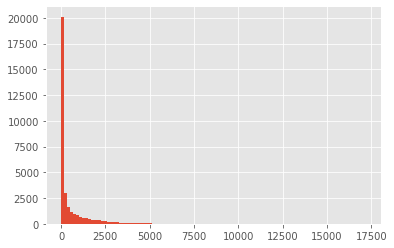

In [33]:
plt.hist(zip_codes_2015["masters_degree"].astype(int), bins = 100);

Text(0, 0.5, 'Count')

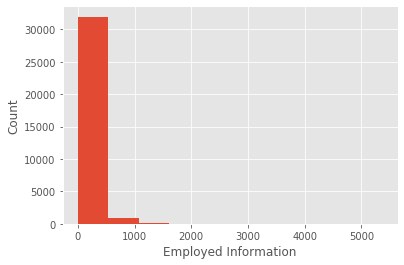

In [34]:
plt.hist(zip_codes_2015["employed_information"].astype(int));
plt.xlabel("Employed Information")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

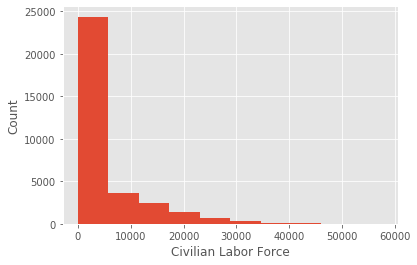

In [35]:
plt.hist(zip_codes_2015["civilian_labor_force"].astype(int));
plt.xlabel("Civilian Labor Force")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

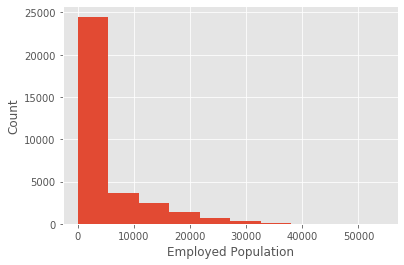

In [36]:
plt.hist(zip_codes_2015["employed_pop"].astype(int));
plt.xlabel("Employed Population")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

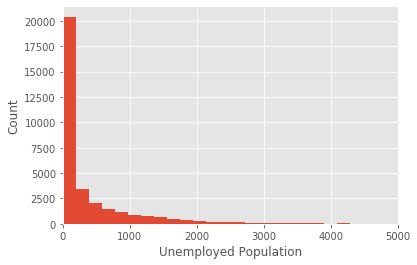

In [37]:
plt.hist(zip_codes_2015["unemployed_pop"].astype(int), bins = 50)
plt.xlim(0, 5000)
plt.xlabel("Unemployed Population")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

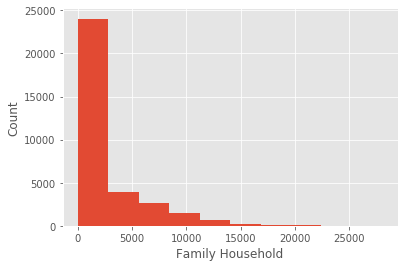

In [38]:
plt.hist(zip_codes_2015["family_households"].astype(int));
plt.xlabel("Family Household")
plt.ylabel("Count")

In [42]:
#Missing Values Count 
zip_codes_2015.isnull().sum()[zip_codes_2015.isnull().sum() > 0]

median_year_structure_built                                      890
median_age                                                       505
median_income                                                   2053
income_per_capita                                                578
median_rent                                                     5880
percent_income_spent_on_rent                                    5298
aggregate_travel_time_to_work                                  12744
renter_occupied_housing_units_paying_cash_median_gross_rent     5689
owner_occupied_housing_units_lower_value_quartile               2879
owner_occupied_housing_units_median_value                       2327
owner_occupied_housing_units_upper_value_quartile               2356
bachelors_degree_2                                               131
different_house_year_ago_different_city                          131
different_house_year_ago_same_city                               131
gini_index                        

In [41]:
#Missing Value Ratio 
zip_codes_2015.isnull().sum()[zip_codes_2015.isnull().sum() > 0]/len(zip_codes_2015)*100

median_year_structure_built                                     2.687198
median_age                                                      1.524758
median_income                                                   6.198671
income_per_capita                                               1.745169
median_rent                                                    17.753623
percent_income_spent_on_rent                                   15.996377
aggregate_travel_time_to_work                                  38.478261
renter_occupied_housing_units_paying_cash_median_gross_rent    17.176932
owner_occupied_housing_units_lower_value_quartile               8.692633
owner_occupied_housing_units_median_value                       7.025966
owner_occupied_housing_units_upper_value_quartile               7.113527
bachelors_degree_2                                              0.395531
different_house_year_ago_different_city                         0.395531
different_house_year_ago_same_city                 

In [39]:
print(len(zip_codes_2015))


33120


In [17]:
zip_codes_2015["gini_index"]

0        0.337000000
1        0.308900000
2        0.372200000
3        0.462400000
4        0.478400000
5        0.335300000
6        0.424700000
7        0.503400000
8        0.352700000
9        0.381900000
10       0.456100000
11       0.686700000
12       0.390800000
13       0.425200000
14       0.233700000
15       0.480700000
16       0.317600000
17       0.287700000
18       0.468700000
19       0.350100000
20       0.228400000
21       0.475600000
22       0.274700000
23       0.390200000
24       0.386200000
25       0.521000000
26       0.421800000
27       0.290300000
28       0.370900000
29       0.363600000
30       0.383600000
31       0.405500000
32       0.361000000
33       0.342900000
34       0.312400000
35       0.472700000
36       0.259900000
37       0.524700000
38       0.350800000
39       0.364300000
40       0.344100000
41       0.329400000
42       0.504100000
43       0.301500000
44       0.284800000
45       0.480300000
46       0.473300000
47       0.47

In [13]:
#zip_codes_2015.value_counts()
zip_codes_2015.describe()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e

In [98]:
zip_codes_2015.geoid.unique() #We Can Eliminate this Feature

array([None], dtype=object)

In [26]:
Zori = pd.read_csv("Zip_ZORI_AllHomesPlusMultifamily_SSA.csv")

In [27]:
Zori.head()

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,61639,10025,1,"New York, NY",3025.0,3039.0,3054.0,3068.0,3083.0,3097.0,3112.0,3126.0,3140.0,3155.0,3169.0,3182.0,3196.0,3207.0,3217.0,3227.0,3233.0,3239.0,3244.0,3248.0,3252.0,3257.0,3260.0,3264.0,3268.0,3270.0,3272.0,3274.0,3276.0,3277.0,3279.0,3277.0,3276.0,3275.0,3275.0,3274.0,3274.0,3275.0,3276.0,3278.0,3276.0,3274.0,3272.0,3269.0,3267.0,3264.0,3263.0,3261.0,3260.0,3260.0,3260.0,3260.0,3262.0,3264.0,3267.0,3270.0,3274.0,3277.0,3281.0,3286.0,3290.0,3298.0,3305.0,3313.0,3324.0,3334.0,3345.0,3353.0,3361.0,3369.0,3361.0,3353.0,3346.0,3311.0,3277.0,3242.0,3201.0,3159.0,3117.0,3073.0,3029.0,2985.0,2938.0,2891.0
1,84654,60657,2,"Chicago, IL",1580.0,1585.0,1591.0,1596.0,1602.0,1607.0,1612.0,1618.0,1623.0,1628.0,1633.0,1638.0,1643.0,1648.0,1653.0,1657.0,1662.0,1666.0,1670.0,1675.0,1679.0,1684.0,1689.0,1694.0,1699.0,1703.0,1708.0,1713.0,1717.0,1722.0,1726.0,1730.0,1735.0,1739.0,1742.0,1745.0,1748.0,1750.0,1752.0,1754.0,1755.0,1756.0,1758.0,1759.0,1761.0,1762.0,1763.0,1765.0,1766.0,1766.0,1766.0,1767.0,1767.0,1767.0,1767.0,1768.0,1769.0,1770.0,1773.0,1776.0,1778.0,1783.0,1788.0,1793.0,1799.0,1806.0,1812.0,1817.0,1822.0,1827.0,1828.0,1829.0,1830.0,1825.0,1820.0,1816.0,1810.0,1803.0,1797.0,1791.0,1784.0,1777.0,1770.0,1762.0
2,61637,10023,3,"New York, NY",3156.0,3164.0,3172.0,3180.0,3188.0,3195.0,3203.0,3210.0,3218.0,3225.0,3231.0,3237.0,3242.0,3248.0,3254.0,3260.0,3267.0,3274.0,3281.0,3287.0,3294.0,3300.0,3305.0,3309.0,3314.0,3314.0,3313.0,3313.0,3309.0,3305.0,3301.0,3298.0,3295.0,3292.0,3293.0,3295.0,3296.0,3298.0,3301.0,3303.0,3304.0,3304.0,3305.0,3304.0,3304.0,3303.0,3300.0,3298.0,3296.0,3295.0,3295.0,3295.0,3299.0,3303.0,3306.0,3310.0,3314.0,3317.0,3323.0,3328.0,3333.0,3341.0,3350.0,3358.0,3366.0,3375.0,3384.0,3391.0,3397.0,3404.0,3397.0,3390.0,3383.0,3349.0,3316.0,3282.0,3241.0,3201.0,3160.0,3116.0,3073.0,3029.0,2983.0,2937.0
3,91982,77494,4,"Houston, TX",1778.0,1781.0,1784.0,1787.0,1790.0,1793.0,1795.0,1798.0,1801.0,1803.0,1805.0,1806.0,1808.0,1807.0,1807.0,1807.0,1805.0,1804.0,1802.0,1799.0,1796.0,1792.0,1787.0,1782.0,1777.0,1770.0,1764.0,1758.0,1751.0,1744.0,1738.0,1733.0,1729.0,1724.0,1722.0,1720.0,1717.0,1717.0,1718.0,1718.0,1721.0,1724.0,1728.0,1731.0,1735.0,1739.0,1742.0,1745.0,1747.0,1749.0,1750.0,1751.0,1751.0,1751.0,1751.0,1752.0,1753.0,1753.0,1755.0,1757.0,1759.0,1762.0,1764.0,1767.0,1769.0,1771.0,1773.0,1775.0,1776.0,1778.0,1779.0,1780.0,1781.0,1783.0,1785.0,1787.0,1791.0,1794.0,1797.0,1800.0,1804.0,1807.0,1810.0,1814.0
4,84616,60614,5,"Chicago, IL",1704.0,1709.0,1714.0,1720.0,1724.0,1729.0,1734.0,1738.0,1743.0,1747.0,1752.0,1756.0,1761.0,1766.0,1771.0,1776.0,1782.0,1787.0,1793.0,1801.0,1809.0,1818.0,1825.0,1833.0,1840.0,1846.0,1851.0,1857.0,1861.0,1864.0,1868.0,1871.0,1874.0,1876.0,1878.0,1880.0,1882.0,1884.0,1885.0,1886.0,1889.0,1892.0,1895.0,1898.0,1902.0,1905.0,1908.0,1910.0,1912.0,1914.0,1915.0,1917.0,1918.0,1919.0,1921.0,1923.0,1926.0,1928.0,1932.0,1935.0,1939.0,1945.0,1950.0,1956.0,1962.0,1969.0,1975.0,1979.0,1984.0,1988.0,1990.0,1991.0,1993.0,1986.0,1980.0,1973.0,1963.0,1953.0,1943.0,1931.0,1920.0,1909.0,1897.0,1885.0


In [28]:
Zori.describe()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
count,2263.000000,2263.000000,2263.000000,1726.000000,1785.000000,1740.000000,1961.000000,2030.000000,2094.000000,2129.000000,2119.000000,2113.000000,2062.000000,2022.000000,2027.000000,2066.000000,2060.000000,2144.000000,2146.000000,2184.000000,2211.000000,2223.000000,2210.000000,2210.000000,2141.000000,2196.000000,2145.000000,2183.000000,2191.000000,2199.000000,2218.000000,2231.000000,2235.000000,2233.000000,2233.000000,2236.000000,2197.000000,2234.000000,2204.000000,2232.0000,2232.000000,2244.000000,2250.000000,2251.000000,2251.000000,2252.000000,2258.000000,2253.000000,2240.000000,2246.000000,2231.000000,2243.000000,2250.000000,2252.000000,2245.000000,2254.000000,2257.000000,2254.000000,2253.000000,2258.000000,2251.000000,2254.000000,2245.000000,2246.000000,2258.000000,2258.000000,2253.000000,2257.000000,2255.000000,2254.000000,2256.000000,2256.000000,2250.000000,2254.000000,2254.000000,2259.000000,2249.000000,2245.000000,2241.000000,2245.000000,2242.000000,2243.000000,2248.000000,2250.000000,2246.000000,2253.000000,2241.000000
mean,86395.516571,54863.478568,2364.555899,1415.331402,1392.964146,1399.628161,1421.954105,1437.756158,1451.692932,1462.501644,1468.586126,1480.361098,1489.921435,1489.259644,1498.378885,1502.831559,1502.619417,1525.312966,1533.277260,1543.981685,1550.359566,1559.714350,1561.046606,1574.535294,1574.109295,1582.028689,1582.217249,1595.381585,1599.016887,1600.665302,1612.384581,1612.632900,1621.107383,1626.214957,1630.870130,1635.538909,1638.301775,1644.631155,1644.689655,1651.3181,1654.154570,1657.049911,1665.680889,1671.370058,1672.613949,1674.320604,1682.098317,1683.969818,1687.758929,1694.496438,1697.854774,1701.946500,1709.280000,1713.794849,1718.636526,1723.838509,1728.946389,1734.487134,1740.778074,1744.578831,1750.323412,1755.516415,1759.991537,1762.128228,1770.324624,1775.968113,1777.874834,1787.213115,1791.666519,1795.922804,1800.783245,1806.163564,1809.834667,1812.783940,1815.371783,1818.945551,1820.728324,1823.416927,1824.342258,1829.612472,1833.037913,1834.942488,1836.815391,1839.804444,1837.505343,1844.338216,1846.013833
std,44128.054155,30725.555791,1788.855500,559.076311,533.690565,540.861551,554.225777,556.389453,564.005099,573.657619,576.371768,585.784657,596.916417,595.986492,603.659118,602.563768,583.290463,610.409947,621.788134,624.783316,629.608490,635.298685,633.346684,643.935441,642.718418,642.605942,639.813531,652.167814,649.924410,643.387331,645.343792,641.728042,646.128898,651.567780,652.577972,653.135312,654.128675,653.839368,653.676160,654.9131,654.630553,642.640515,658.596118,658.941169,644.580436,642.412493,659.837968,657.213807,658.698657,661.620914,661.830044,662.123752,664.152995,664.890275,666.586119,666.365753,667.741209,670.390715,671.888427,671.029029,674.702088,675.135719,674.058809,671.359648,678.029212,679.172753,666.412500,680.755482,682.246482,683.640056,683.963748,684.436401,685.460432,684.953981,683.087367,682.615175,680.431690,674.887450,669.492727,668.273245,665.935574,663.328659,651.460029,647.088417,621.448066,649.010398,644.754011
min,58477.000000,1752.000000,1.000000,508.000000,546.000000,549.000000,519.000000,550.000000,550.000000,529.000000,533.000000,536.000000,552.000000,574.000000,541.000000,543.000000,557.000000,559.000000,549.000000,551.000000,554.000000,5

In [35]:
Zori_2015 = Zori.iloc[:,16:28]
Zori.groupby(['MsaName']).mean()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
MsaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Albuquerque, NM",95311.857143,87119.857143,1171.571429,922.285714,934.166667,935.833333,937.000000,941.714286,946.571429,951.285714,956.142857,961.000000,965.428571,969.285714,972.714286,957.500000,978.571429,980.571429,982.714286,984.285714,985.857143,987.142857,989.142857,990.714286,992.571429,994.857143,997.142857,999.857143,1002.714286,1005.857143,1009.000000,1012.000000,1014.857143,1017.857143,1020.000000,1022.142857,1024.285714,1025.714286,1027.000000,1028.714286,1029.857143,1031.142857,1032.142857,1034.000000,1035.571429,1037.142857,1039.571429,1041.571429,1043.571429,1046.000000,1048.571429,1050.714286,1053.142857,1055.857143,1058.142857,1060.571429,1063.285714,1065.428571,1068.428571,1071.285714,1074.000000,1077.714286,1081.142857,1084.714286,1089.428571,1094.000000,1098.714286,1103.571429,1108.571429,1113.428571,1118.571429,1123.428571,1128.142857,1132.428571,1136.714286,1141.000000,1146.428571,1152.285714,1157.714286,1164.142857,1170.714286,1177.142857,1183.571429,1190.285714,1196.857143,1203.714286,1210.285714
"Allentown, PA",65331.666667,18054.000000,1642.333333,878.500000,979.333333,982.000000,984.666667,1002.500000,990.000000,992.666667,994.666667,997.333333,1000.000000,1002.333333,1005.000000,1007.333333,1009.333333,1011.666667,1014.000000,1017.000000,1020.000000,1023.000000,1026.666667,1031.000000,1035.000000,1039.000000,1043.666667,1047.666667,1052.333333,1056.333333,1061.000000,1064.000000,1067.333333,1070.333333,1072.333333,1074.666667,1076.333333,1078.333333,1080.000000,1081.666667,1083.333333,1085.000000,1086.333333,1089.666667,1092.333333,1095.333333,1099.333333,1103.666667,1107.666667,1112.000000,1116.666667,1121.000000,1125.333333,1129.666667,1133.666667,1137.000000,1140.000000,1143.000000,1145.666667,1148.666667,1151.333333,1154.000000,1156.333333,1158.666667,1162.333333,1165.000000,1168.333333,1171.333333,1174.666667,1177.333333,1180.000000,1182.666667,1185.333333,1187.666667,1190.666667,1193.000000,1197.666667,1202.666667,1207.666667,1213.666667,1219.666667,1225.333333,1231.333333,1238.000000,1244.000000,1250.333333,1276.000000
"Atlanta, GA",70928.215054,30174.430108,1803.462366,1140.277108,1146.666667,1152.413793,1157.422222,1165.053763,1159.887640,1171.670330,1181.827957,1185.369565,1192.946237,1198.591398,1204.193548,1209.774194,1213.000000,1219.554348,1224.717391,1229.684783,1235.569892,1240.741935,1246.311828,1251.946237,1248.714286,1263.739130,1269.612903,1268.576087,1279.239130,1285.120879,1295.043478,1299.731183,1305.462366,1311.311828,1321.152174,1321.903226,1327.182796,1326.423913,1337.247312,1342.258065,1346.141304,1352.010753,1356.881720,1362.565217,1366.397849,1371.043011,1376.139785,1381.247312,1386.258065,1391.623656,1396.989247,1402.333333,1407.924731,1413.548387,1419.086022,1425.923913,1431.956522,1437.301075,1443.623656,1449.881720,1456.182796,1462.290323,1468.387097,1474.548387,1480.290323,1485.978495,1491.731183,1496.784946,1501.903226,1506.946237,1511.526882,1516.118280,1520.634409,1525.182796,1529.688172,1534.268817,1540.978495,1547.774194,1554.569892,1562.322581,1570.118280,1579.902174,1585.795699,1593.752688,1601.677419,1609.924731,1620.233333
"Augusta, GA",71336.000000,30875.333333,850.000000

In [34]:
Zori.isnull().sum()[Zori.isnull().sum() > 0]

2014-01    537
2014-02    478
2014-03    523
2014-04    302
2014-05    233
2014-06    169
2014-07    134
2014-08    144
2014-09    150
2014-10    201
2014-11    241
2014-12    236
2015-01    197
2015-02    203
2015-03    119
2015-04    117
2015-05     79
2015-06     52
2015-07     40
2015-08     53
2015-09     53
2015-10    122
2015-11     67
2015-12    118
2016-01     80
2016-02     72
2016-03     64
2016-04     45
2016-05     32
2016-06     28
2016-07     30
2016-08     30
2016-09     27
2016-10     66
2016-11     29
2016-12     59
2017-01     31
2017-02     31
2017-03     19
2017-04     13
2017-05     12
2017-06     12
2017-07     11
2017-08      5
2017-09     10
2017-10     23
2017-11     17
2017-12     32
2018-01     20
2018-02     13
2018-03     11
2018-04     18
2018-05      9
2018-06      6
2018-07      9
2018-08     10
2018-09      5
2018-10     12
2018-11      9
2018-12     18
2019-01     17
2019-02      5
2019-03      5
2019-04     10
2019-05      6
2019-06      8
2019-07   

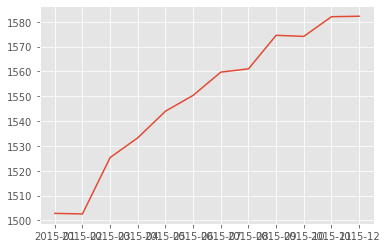

In [49]:
plt.plot(Zori_2015.mean())